In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread
from skimage.filters import threshold_multiotsu
import os
import porespy as ps
from tifffile import imwrite
from hydra.experimental import compose, initialize
from omegaconf import OmegaConf

def clean_img(img_t):
    '''
    2  3^3 median image filter
    3 Otsu binary segmentation
    https://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm
    https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_multiotsu.html
    '''

    thresholds = threshold_multiotsu(img_t,classes=2)
    # from the threshold we separate regions
    img_t = np.digitize(img_t, bins=thresholds)

    return img_t


def img_crop(img,crop_size):
    x_max = img.shape[0]
    y_max = img.shape[1]
    z_max = img.shape[2]

    sec = img[
        crop_size:x_max-crop_size,
        crop_size:y_max-crop_size,
        crop_size:z_max-crop_size
        ]
    return sec


def np_to_tif(img,f_name):
    '''
    convert numpy to tif
    '''

    img_save = (img * 255).astype('uint8')
    # Save the 3D array as a 3D tif
    imwrite(f_name, img_save)

def tif_to_np(f_name):
    '''
    convert tif to numpy
    '''
    img = imread(f_name)
    img = img.astype('float32')/255
    return img>0.5


In [2]:
# initialize the config
initialize(config_path=f"../config/ex7")
cfg = compose(config_name="dataset")

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/hydra/experimental/initialize.py:43: UserWarning: hydra.experimental.initialize() is no longer experimental. Use hydra.initialize()
  deprecation_warning(message=message)
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/hydra/experimental/initialize.py:45: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  self.delegate = real_initialize(
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/hydra/experimental/compose.py:25: UserWarning: hydra.experimental.compose() is no longer experimental. Use hydra.compose()
  deprecation_warning(message=message)


#### Read main volume ($625^3$) of those tif

In [3]:
img_list = []
for i in range(6):
    img_list.append(
        tif_to_np(
            os.path.join(
                cfg.PATH.main_vol,
                f'main_{i}.tif'
                )
                  )
        )

#### Calculate porosity

In [4]:
for img in img_list:
    print('Porosity of image is {}'.format(ps.metrics.porosity(img)))

Porosity of image is 0.15423793572440886
Porosity of image is 0.1994853984506826
Porosity of image is 0.1665752701826591
Porosity of image is 0.19992378274897468
Porosity of image is 0.14275199576877845
Porosity of image is 0.09128284891840108


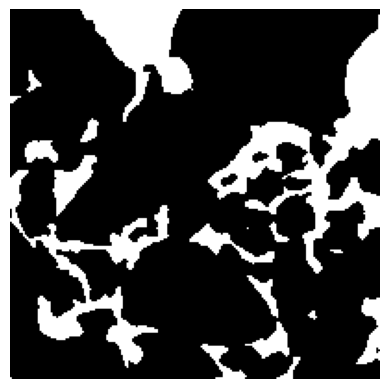

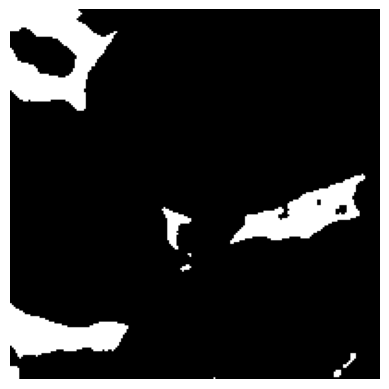

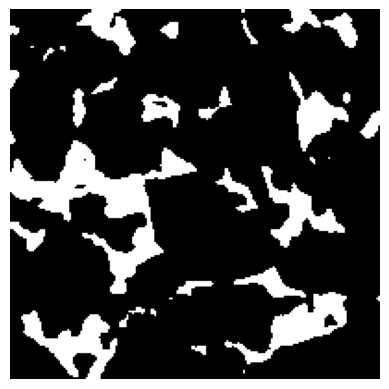

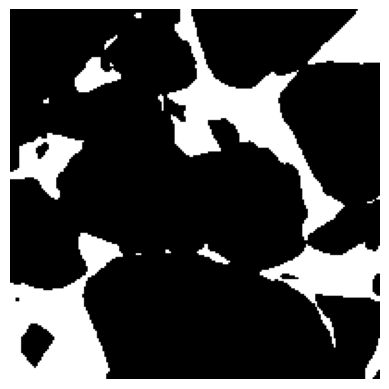

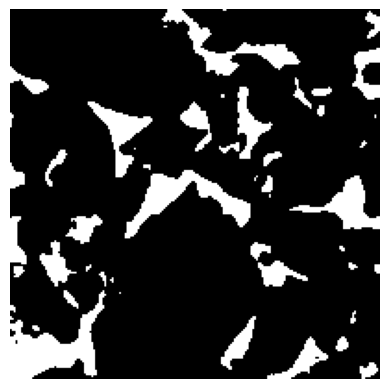

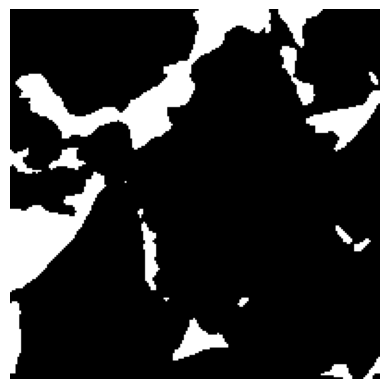

In [5]:
for sec_seg in img_list:
    plt.imshow(sec_seg[0,0:200,0:200],cmap='gray')
    plt.axis('off')
    plt.show()

#### Load sub-volumes ($128^3$)

In [6]:
img_list = []
ct_idx = 0
PATH = os.path.join(cfg.PATH.sub_vol_large,f'ct_{ct_idx}')

for i in range(6):
    
    img_list.append(
        tif_to_np(
            os.path.join(
                PATH,
                f'{i}.tif'
                )
                  )
        )

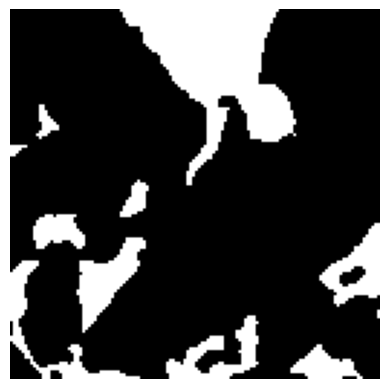

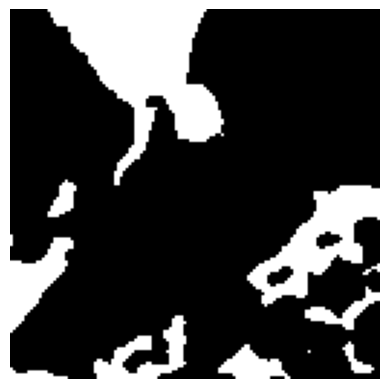

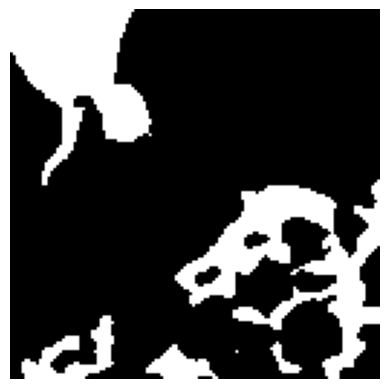

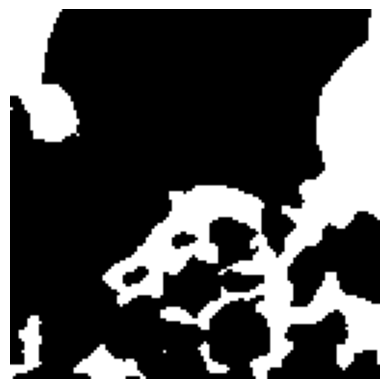

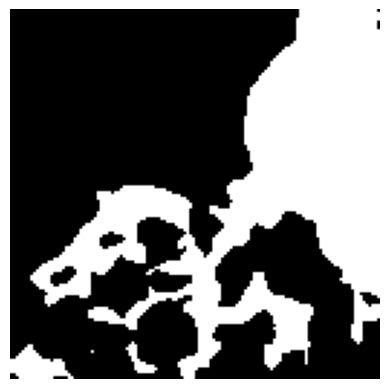

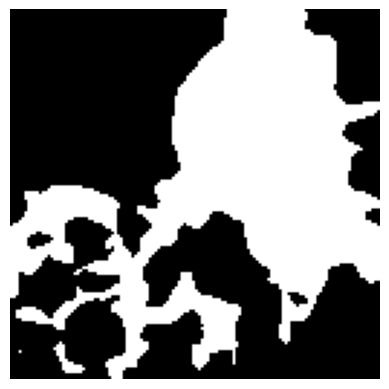

In [7]:
# 128*128*128
for sec_seg in img_list:
    plt.imshow(sec_seg[0,::],cmap='gray')
    plt.axis('off')
    plt.show()

#### Load sub-volume $64^3$

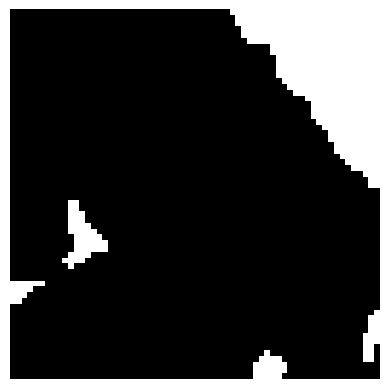

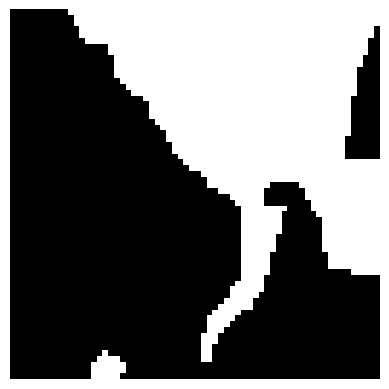

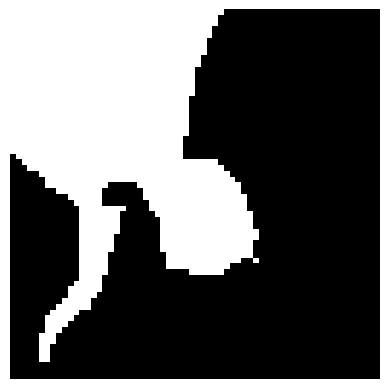

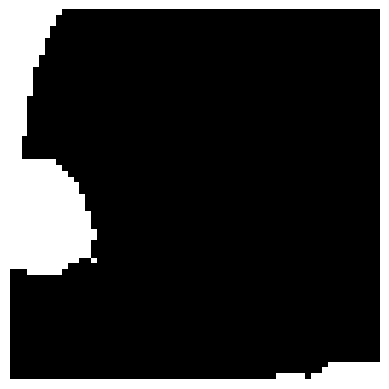

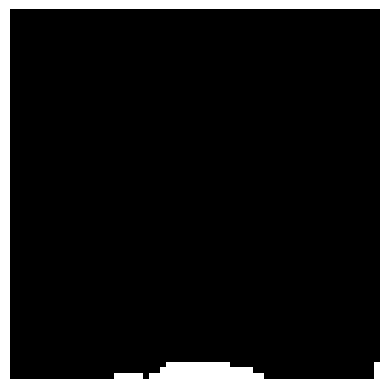

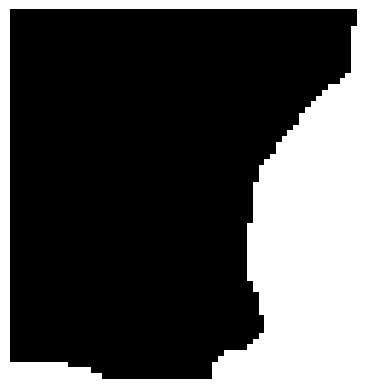

In [8]:
# 64*64*64
img_list = []
ct_idx = 0
PATH = os.path.join(cfg.PATH.sub_vol,f'ct_{ct_idx}')

for i in range(6):
    
    img_list.append(
        tif_to_np(
            os.path.join(
                PATH,
                f'{i}.tif'
                )
                  )
        )


for sec_seg in img_list:
    plt.imshow(sec_seg[0,::],cmap='gray')
    plt.axis('off')
    plt.show()

/tmp/ipykernel_297836/3798308901.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filled = np.ones((img.shape[0], img.shape[1], img.shape[2]), dtype=np.bool)


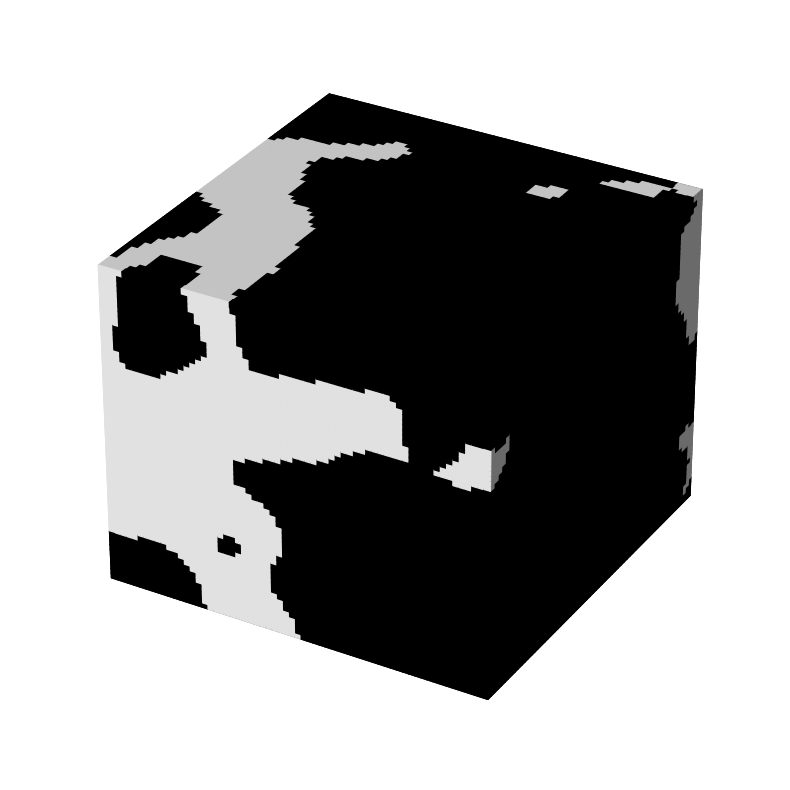

In [9]:
def plot_3D(img): 
    # Generating a 3D sine wave
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')

    # Set black and white colors based on boolean_data
    # colors = np.empty(img.shape + (4,), dtype=np.float32)
    colors = np.empty(img.shape, dtype=object)

    colors[img] = 'white'  # White for True values
    colors[~img] = 'black'  # Black for False values

    plt.axis('off')
    filled = np.ones((img.shape[0], img.shape[1], img.shape[2]), dtype=np.bool)

    # Display the boolean_data using voxels
    ax.voxels(filled, facecolors=colors,edgecolors=colors)

    # Show the plot
    plt.show()

    # Plot the 3D image
plot_3D(img_list[1])

#### Bentheimer

In [11]:
PATH = os.path.join(init_yaml.PATH['img_path']['main_vol'],'bentheimer','Bentheimer_1000c_3p0035um.raw')
with open(PATH, 'rb') as file:
    img_data = np.fromfile(file, dtype=np.uint16)
    img_data = img_data.reshape((1000,1000,500))<0.5

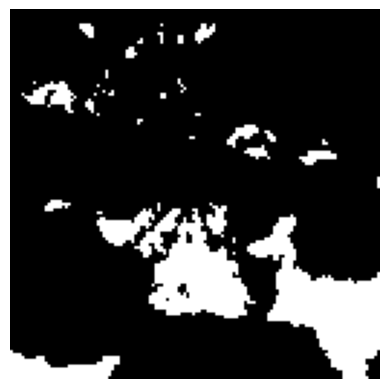

In [18]:
plt.imshow(img_data[:128,:128,5],cmap='gray')
plt.axis('off')
plt.show()

In [3]:
for sec_seg in img_list:
    plt.imshow(sec_seg[0,::],cmap='gray')
    plt.axis('off')
    plt.show()

(500000000,)